In [1]:
# Importing libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
# Visualizing 6 decimals per value
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Reading data from csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

sensorama = load_dataset('sensorama_df.csv')

In [3]:
# Since odor name and canonical_smiles variables are strings, we change them to a numerical value
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['canonical_smiles'])
sensorama['canonical_smiles']= label_encoder.transform(sensorama['canonical_smiles'])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['odor name'])
sensorama['odor name']= label_encoder.transform(sensorama['odor name'])

In [4]:
# Normalizing function
def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_train -= mean
    x_train /= std

# Normalizing data
s= sensorama.columns
s=s.drop(['odor level', 'cid','canonical_smiles', 'odor name'])
for c in s:
    standarize(sensorama[c])
# After normalizing the data, we have NaNs values, so we change them to 0
sensorama=sensorama.fillna(0)

In [5]:
# Creating a new dataframe with only those molecules of odor level = 3
sensorama_3 = []
for i in range (0,17994):
    if sensorama.loc[i,'odor level'] == 3:
        sensorama_3.append(sensorama.loc[i,:])
sensorama_3 = pd.DataFrame(sensorama_3)

In [6]:
X = sensorama_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_3['odor name']

### ALL ODOR NAMES 

#### RANDOM FOREST

Accuracy:  6.923076923076923 %


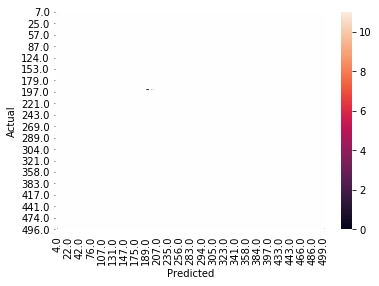

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

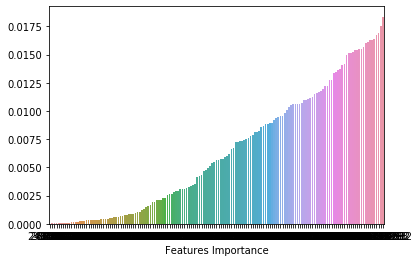

In [8]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [9]:
X = sensorama_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_3['odor name']

Accuracy:  6.666666666666667 %


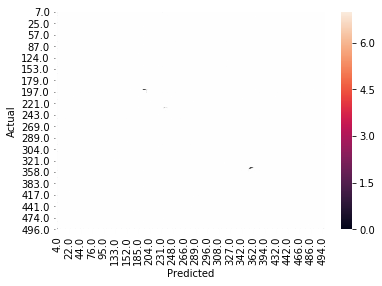

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [11]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 6.923076923076923 %


##### Polynomial Kernel


In [12]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 5.769230769230769 %


##### Sigmoid Kernel 

In [13]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 7.564102564102564 %


#### DECISION TREE

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 5.876068376068376 %


#### LOGISTIC REGRESSION 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  6.153846153846154 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

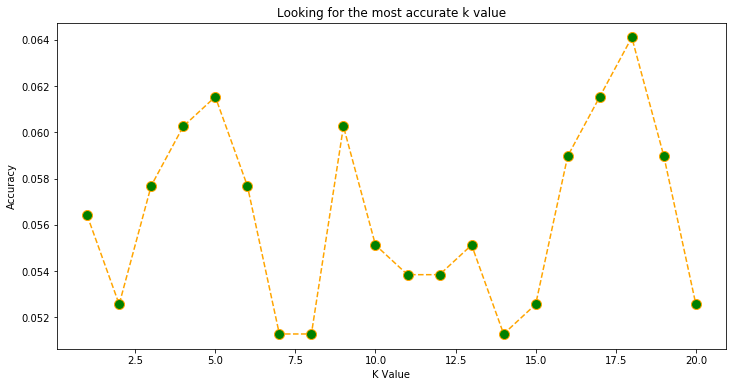

In [16]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [17]:
clf = KNeighborsClassifier(n_neighbors=18)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 6.41025641025641 %


### 25 MOST COMMON ODOR NAMES 

In [23]:
sensorama_3 = sensorama_3.sort_values('odor name')

In [26]:
sensorama2_3=[]

for i in range(23, len(sensorama_3)-23):
    if sensorama_3.iloc[i,4] == sensorama_3.iloc[i+23,4] or sensorama_3.iloc[i,4] == sensorama_3.iloc[i-23,4]:
        sensorama2_3.append(sensorama_3.iloc[i,:]) 

sensorama2_3= pd.DataFrame(sensorama2_3)
sensorama2_3

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
4791,23716.000000,2870.000000,1.598081,3.000000,9.000000,1.352513,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.757737,-0.479776,0.756794,0.000000,0.000000,0.520782,1.157086,0.961588,0.140408,-0.161598
9648,103648.000000,428.000000,0.346729,3.000000,9.000000,0.015569,0.200130,-0.631781,0.632666,-0.644741,...,0.577905,0.433022,0.862903,0.000000,0.000000,0.928716,1.207604,1.027138,0.934140,-0.161598
4419,19801.000000,2722.000000,0.624807,3.000000,9.000000,0.229345,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.895942,-0.623930,0.014035,0.000000,0.000000,-0.074694,0.836626,0.572582,-0.171766,-0.161598
4662,21768.000000,366.000000,0.346729,3.000000,9.000000,-0.519433,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.780665,-0.479733,-0.304291,0.000000,0.000000,-0.250669,0.672093,0.390816,-0.146687,-0.161598
11295,170284.000000,818.000000,0.624807,3.000000,9.000000,0.978124,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.780665,-0.479733,0.120143,0.000000,0.000000,0.025036,0.726637,0.449720,-0.261307,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14849,5365909.000000,2076.000000,-0.974143,3.000000,494.000000,-0.519433,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.896453,-1.008518,-1.153159,0.000000,0.000000,-1.270918,-0.469363,-0.534622,-1.336265,5.273531
9526,102667.000000,1039.000000,-0.696065,3.000000,494.000000,0.603735,2.356503,-0.631781,0.632666,-0.644741,...,0.301495,-0.576056,-0.198182,0.000000,0.000000,-0.212547,-0.433140,-0.514265,-0.469846,-0.161598
5341,31253.000000,363.000000,1.041924,3.000000,494.000000,-0.893823,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.941840,-0.815957,-0.304291,0.000000,0.000000,-0.295448,0.859803,0.599162,-0.259547,-0.161598
3816,15406.000000,1053.000000,-0.209428,3.000000,494.000000,1.352513,2.356503,-0.631781,0.632666,-0.644741,...,0.577393,-0.912238,0.014035,0.000000,0.000000,-0.074694,-0.235021,-0.392477,-0.470147,-0.161598


In [27]:
count=0
for i in range(1, len(sensorama2_3)):
    if sensorama2_3.iloc[i,4]!= sensorama2_3.iloc[i-1,4]:
        count = count +1
print(count)

25


In [28]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

#### RANDOM FOREST

Accuracy:  18.92744479495268 %


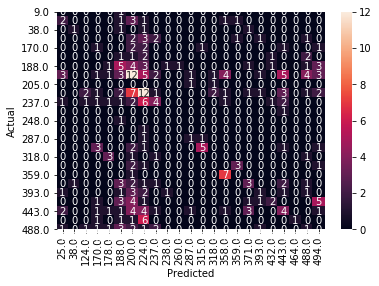

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

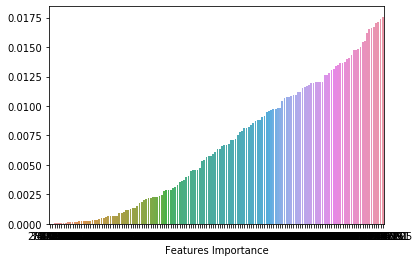

In [30]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [31]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                  'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

Accuracy:  18.29652996845426 %


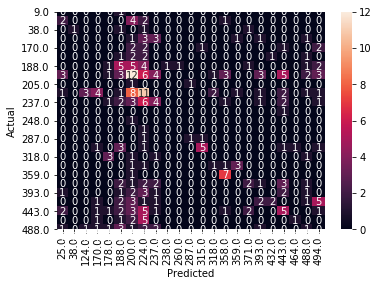

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [33]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 18.29652996845426 %


##### Polynomial Kernel


In [34]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 13.880126182965299 %


##### Sigmoid Kernel 

In [35]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 15.772870662460567 %


#### DECISION TREE

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 12.335958005249344 %


#### LOGISTIC REGRESSION 

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  15.772870662460567 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

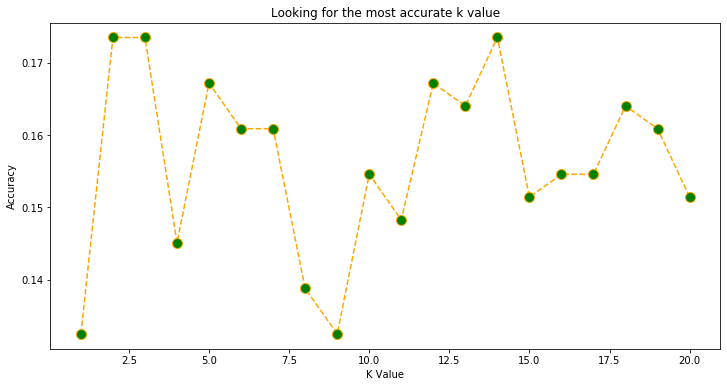

In [38]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [40]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 17.350157728706623 %


### 15 MOST COMMON ODOR NAMES 

In [41]:
sensorama_3 = sensorama_3 .sort_values('odor name')

In [46]:
sensorama2_3=[]

for i in range(38, len(sensorama_3)-38):
    if sensorama_3.iloc[i,4] == sensorama_3.iloc[i+38,4] or sensorama_3.iloc[i,4] == sensorama_3.iloc[i-38,4]:
        sensorama2_3.append(sensorama_3.iloc[i,:]) 

sensorama2_3= pd.DataFrame(sensorama2_3)
sensorama2_3

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
12708,574707.000000,2304.000000,-0.487506,3.000000,25.000000,0.520620,0.200130,-0.631781,0.632666,-0.644741,...,-0.665941,-0.576056,-0.198182,0.000000,0.000000,-0.311574,-0.140229,-0.327956,-0.462249,-0.161598
4066,16872.000000,2928.000000,0.485768,3.000000,25.000000,0.978124,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.251837,-0.431902,0.332360,0.000000,0.000000,0.146060,0.654120,0.371705,-0.173807,-0.161598
16355,6440993.000000,1765.000000,0.207689,3.000000,25.000000,0.229345,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.343633,0.336208,0.120143,0.000000,0.000000,0.008208,0.437196,0.152432,-0.111014,-0.161598
11603,229377.000000,2621.000000,0.485768,3.000000,25.000000,0.978124,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.481838,-0.239875,0.332360,0.000000,0.000000,0.146060,0.649749,0.367076,-0.172073,-0.161598
11514,219357.000000,248.000000,-0.348467,3.000000,124.000000,-0.786747,0.200130,-0.631781,0.632666,-0.644741,...,-1.356455,-1.536727,-1.259267,0.000000,0.000000,-1.254792,-0.069864,-0.277453,-1.262610,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,3314.000000,3317.000000,-0.557026,3.000000,494.000000,-1.642601,0.200130,1.183366,0.632666,1.285620,...,0.316213,0.096307,-0.516508,0.000000,0.000000,-0.405350,-0.790517,-0.689256,0.025329,-0.161598
11838,439711.000000,1053.000000,-0.209428,3.000000,494.000000,1.352513,2.356503,-0.631781,0.632666,-0.644741,...,0.577393,-0.912238,0.014035,0.000000,0.000000,-0.074694,-0.235021,-0.392477,-0.470147,-0.161598
8556,86749.000000,1905.000000,0.138170,3.000000,494.000000,0.603735,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.573634,-0.623930,0.226252,0.000000,0.000000,0.063158,0.376199,0.094600,-0.132868,-0.161598
11805,346286.000000,917.000000,-0.557026,3.000000,494.000000,-1.559487,0.200130,1.183366,0.632666,1.285620,...,-0.251326,-0.192001,-0.834833,0.000000,0.000000,-0.725131,-0.702318,-0.651413,-0.381823,-0.161598


In [47]:
count=0
for i in range(1, len(sensorama2_3)):
    if sensorama2_3.iloc[i,4]!= sensorama2_3.iloc[i-1,4]:
        count = count +1
print(count)

15


In [48]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

#### RANDOM FOREST

Accuracy:  21.49532710280374 %


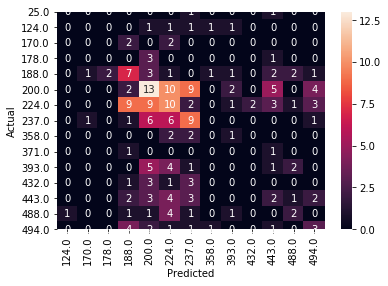

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

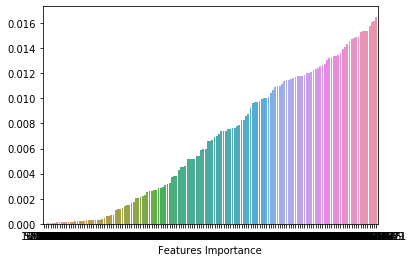

In [50]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [51]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

Accuracy:  25.233644859813083 %


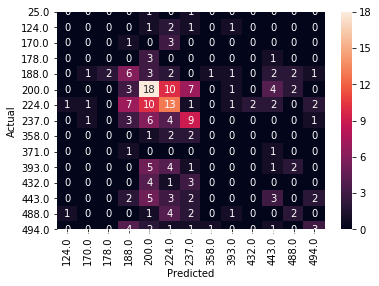

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [53]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 22.897196261682243 %


##### Polynomial Kernel


In [54]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 20.093457943925234 %


##### Sigmoid Kernel 

In [55]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 21.962616822429908 %


#### DECISION TREE

In [56]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 19.06614785992218 %


#### LOGISTIC REGRESSION 

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  19.626168224299064 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

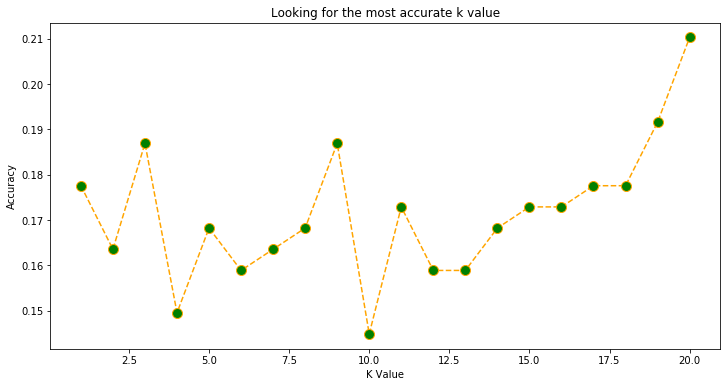

In [58]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [59]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 21.02803738317757 %


### 10 MOST COMMON ODOR NAMES 

In [60]:
sensorama_3 = sensorama_3.sort_values('odor name')

In [103]:
sensorama2_3=[]

for i in range(48, len(sensorama_3)-48):
    if sensorama_3.iloc[i,4] == sensorama_3.iloc[i+48,4] or sensorama_3.iloc[i,4] == sensorama_3.iloc[i-48,4]:
        sensorama2_3.append(sensorama_3.iloc[i,:]) 

sensorama2_3= pd.DataFrame(sensorama2_3)
sensorama2_3

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
8861,91147.000000,2418.000000,0.068650,3.000000,170.000000,0.671873,0.200130,-0.631781,0.632666,-0.644741,...,-0.159019,0.000560,0.332360,0.000000,0.000000,0.245087,0.587502,0.302111,0.040273,-0.161598
13808,5283345.000000,2722.000000,0.624807,3.000000,170.000000,0.229345,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.895942,-0.623930,0.014035,0.000000,0.000000,-0.074694,0.836626,0.572582,-0.171766,-0.161598
5976,61096.000000,2895.000000,0.763846,3.000000,188.000000,1.012193,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.343633,-0.287748,0.650686,0.000000,0.000000,0.465831,0.966323,0.724451,0.128970,-0.161598
9780,105664.000000,3179.000000,1.041924,3.000000,188.000000,1.064608,0.200130,-0.631781,0.632666,-0.644741,...,1.176098,1.825074,1.181228,0.000000,0.000000,1.050443,1.149105,0.951344,0.690191,-0.161598
2741,10778.000000,1332.000000,-0.835104,3.000000,188.000000,-1.559487,0.200130,1.183366,0.632666,1.285620,...,-0.205428,-0.239875,-0.834833,0.000000,0.000000,-0.725131,-0.782190,-0.685830,-0.396780,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,61129.000000,1105.000000,1.041924,3.000000,494.000000,1.118520,2.356503,-0.631781,0.632666,-0.644741,...,3.111494,3.219288,1.605662,0.000000,0.000000,1.651180,0.726012,0.449038,1.230630,-0.161598
13031,1252759.000000,1354.000000,-0.626545,3.000000,494.000000,0.229345,0.200130,-0.631781,0.632666,-0.644741,...,0.071494,-0.576056,-0.198182,0.000000,0.000000,-0.212547,-0.177632,-0.353908,-0.329040,-0.161598
10051,107272.000000,1677.000000,1.041924,3.000000,494.000000,1.352513,0.200130,-0.631781,0.632666,-0.644741,...,0.624314,0.529302,1.181228,0.000000,0.000000,1.022492,0.911848,0.659747,0.584266,-0.161598
4190,17586.000000,1969.000000,-0.696065,3.000000,494.000000,1.352513,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.310557,-1.248419,-0.834833,0.000000,0.000000,-1.078114,-0.554926,-0.580356,-1.367154,-0.161598


In [104]:
count=0
for i in range(1, len(sensorama2_3)):
    if sensorama2_3.iloc[i,4]!= sensorama2_3.iloc[i-1,4]:
        count = count +1
print(count)

10


In [106]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

#### RANDOM FOREST

Accuracy:  27.54491017964072 %


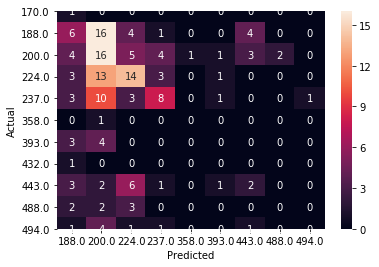

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

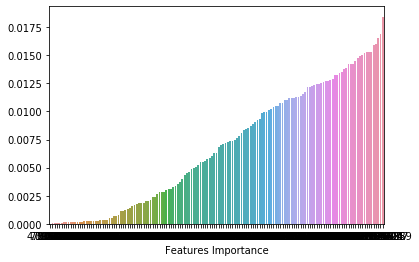

In [108]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [109]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

Accuracy:  25.149700598802394 %


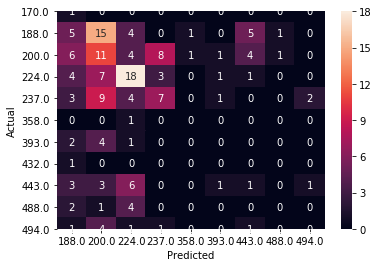

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [111]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 27.54491017964072 %


##### Polynomial Kernel


In [112]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 20.35928143712575 %


##### Sigmoid Kernel 

In [113]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 26.94610778443114 %


#### DECISION TREE

In [114]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 22.388059701492537 %


#### LOGISTIC REGRESSION 

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  25.748502994011975 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

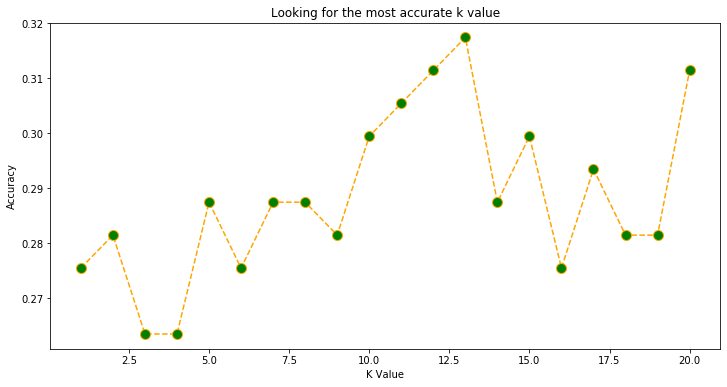

In [116]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [117]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 31.736526946107784 %


### 7 MOST COMMON ODOR NAMES 

In [63]:
sensorama_3 = sensorama_3.sort_values('odor name')

In [118]:
sensorama2_3=[]

for i in range(55, len(sensorama_3)-55):
    if sensorama_3.iloc[i,4] == sensorama_3.iloc[i+55,4] or sensorama_3.iloc[i,4] == sensorama_3.iloc[i-55,4]:
        sensorama2_3.append(sensorama_3.iloc[i,:]) 

sensorama2_3= pd.DataFrame(sensorama2_3)
sensorama2_3

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
5976,61096.000000,2895.000000,0.763846,3.000000,188.000000,1.012193,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.343633,-0.287748,0.650686,0.000000,0.000000,0.465831,0.966323,0.724451,0.128970,-0.161598
9780,105664.000000,3179.000000,1.041924,3.000000,188.000000,1.064608,0.200130,-0.631781,0.632666,-0.644741,...,1.176098,1.825074,1.181228,0.000000,0.000000,1.050443,1.149105,0.951344,0.690191,-0.161598
2741,10778.000000,1332.000000,-0.835104,3.000000,188.000000,-1.559487,0.200130,1.183366,0.632666,1.285620,...,-0.205428,-0.239875,-0.834833,0.000000,0.000000,-0.725131,-0.782190,-0.685830,-0.396780,-0.161598
7853,74351.000000,1305.000000,1.250483,3.000000,188.000000,-2.103475,1.278317,2.998513,2.371507,3.215981,...,0.347392,0.000560,-0.304291,0.000000,0.000000,0.057535,-0.168958,-0.347946,0.924025,-0.161598
17988,92256353.000000,512.000000,0.207689,3.000000,188.000000,0.488423,0.200130,-0.631781,0.632666,-0.644741,...,0.624314,0.529302,0.756794,0.000000,0.000000,0.746787,0.450242,0.165028,0.495772,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13967,5321277.000000,967.000000,1.806640,3.000000,494.000000,-0.145044,0.200130,-0.631781,0.632666,-0.644741,...,0.302006,0.193121,1.075120,0.000000,0.000000,1.165596,1.863721,1.982765,1.191071,-0.161598
828,7130.000000,789.000000,0.694326,3.000000,494.000000,-1.239384,1.278317,2.998513,0.632666,1.285620,...,0.532076,0.409135,0.014035,0.000000,0.000000,0.295118,0.040958,-0.193377,0.840137,-0.161598
9935,106770.000000,529.000000,-0.557026,3.000000,494.000000,0.416540,0.200130,-0.631781,0.632666,-0.644741,...,1.053137,1.201132,0.650686,0.000000,0.000000,0.592819,-0.441397,-0.518958,0.382584,-0.161598
533,6548.000000,1907.000000,0.346729,3.000000,494.000000,1.352513,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.573634,-0.623930,0.438469,0.000000,0.000000,0.201000,0.549683,0.263488,-0.188483,-0.161598


In [120]:
count=0
for i in range(1, len(sensorama2_3)):
    if sensorama2_3.iloc[i,4]!= sensorama2_3.iloc[i-1,4]:
        count = count +1
print(count)

7


In [121]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

#### RANDOM FOREST

Accuracy:  28.37837837837838 %


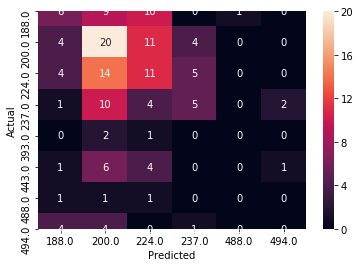

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

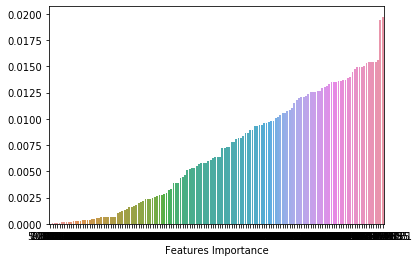

In [123]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [124]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

Accuracy:  26.351351351351347 %


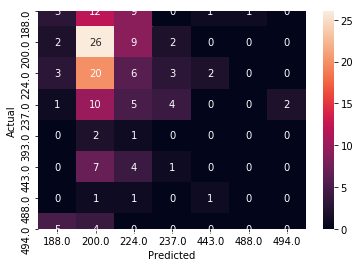

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [126]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 29.054054054054053 %


##### Polynomial Kernel


In [127]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 23.64864864864865 %


##### Sigmoid Kernel 

In [128]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 31.08108108108108 %


#### DECISION TREE

In [129]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 22.033898305084744 %


#### LOGISTIC REGRESSION 

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  31.756756756756754 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

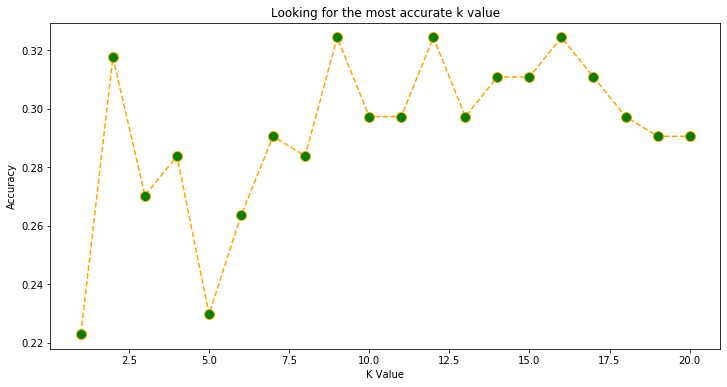

In [131]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [132]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 28.37837837837838 %


### 5 MOST COMMON ODOR NAMES 

In [78]:
sensorama_3 = sensorama_3 .sort_values('odor name')

In [133]:
sensorama2_3=[]

for i in range(65, len(sensorama_3)-65):
    if sensorama_3.iloc[i,4] == sensorama_3.iloc[i+65,4] or sensorama_3.iloc[i,4] == sensorama_3.iloc[i-65,4]:
        sensorama2_3.append(sensorama_3.iloc[i,:]) 

sensorama2_3= pd.DataFrame(sensorama2_3)
sensorama2_3

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
5976,61096.000000,2895.000000,0.763846,3.000000,188.000000,1.012193,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.343633,-0.287748,0.650686,0.000000,0.000000,0.465831,0.966323,0.724451,0.128970,-0.161598
9780,105664.000000,3179.000000,1.041924,3.000000,188.000000,1.064608,0.200130,-0.631781,0.632666,-0.644741,...,1.176098,1.825074,1.181228,0.000000,0.000000,1.050443,1.149105,0.951344,0.690191,-0.161598
2741,10778.000000,1332.000000,-0.835104,3.000000,188.000000,-1.559487,0.200130,1.183366,0.632666,1.285620,...,-0.205428,-0.239875,-0.834833,0.000000,0.000000,-0.725131,-0.782190,-0.685830,-0.396780,-0.161598
7853,74351.000000,1305.000000,1.250483,3.000000,188.000000,-2.103475,1.278317,2.998513,2.371507,3.215981,...,0.347392,0.000560,-0.304291,0.000000,0.000000,0.057535,-0.168958,-0.347946,0.924025,-0.161598
17988,92256353.000000,512.000000,0.207689,3.000000,188.000000,0.488423,0.200130,-0.631781,0.632666,-0.644741,...,0.624314,0.529302,0.756794,0.000000,0.000000,0.746787,0.450242,0.165028,0.495772,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,7166.000000,491.000000,-0.835104,3.000000,494.000000,-1.642601,0.200130,1.183366,0.632666,1.285620,...,-0.067223,0.207940,-0.728725,0.000000,0.000000,-0.543202,-1.196401,-0.818263,-0.127228,-0.161598
15906,6434276.000000,803.000000,0.555287,3.000000,494.000000,0.416540,-0.878056,-0.631781,-1.106175,-0.644741,...,0.025084,0.384615,0.756794,0.000000,0.000000,0.647760,0.631359,0.347694,0.463600,-0.161598
15287,5463905.000000,2170.000000,0.555287,3.000000,494.000000,-0.519433,0.200130,1.183366,0.632666,1.285620,...,0.577905,0.769203,0.650686,0.000000,0.000000,0.790874,0.720114,0.442609,1.028163,-0.161598
6217,61293.000000,2251.000000,-1.252222,3.000000,494.000000,0.884527,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.435940,0.175433,-0.198182,0.000000,0.000000,-0.410601,-0.794889,-0.691044,-0.670003,-0.161598


In [135]:
count=0
for i in range(1, len(sensorama2_3)):
    if sensorama2_3.iloc[i,4]!= sensorama2_3.iloc[i-1,4]:
        count = count +1
print(count)

5


In [136]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

#### RANDOM FOREST

Accuracy:  45.6 %


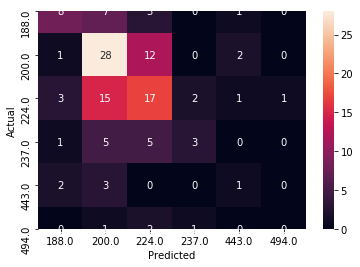

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

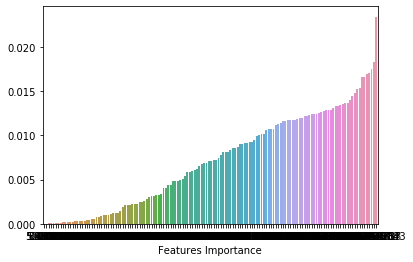

In [138]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [140]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

Accuracy:  45.6 %


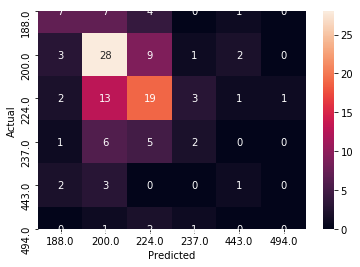

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [142]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 33.6 %


##### Polynomial Kernel


In [143]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 28.799999999999997 %


##### Sigmoid Kernel 

In [144]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 31.2 %


#### DECISION TREE

In [145]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 29.333333333333332 %


#### LOGISTIC REGRESSION 

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  36.0 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

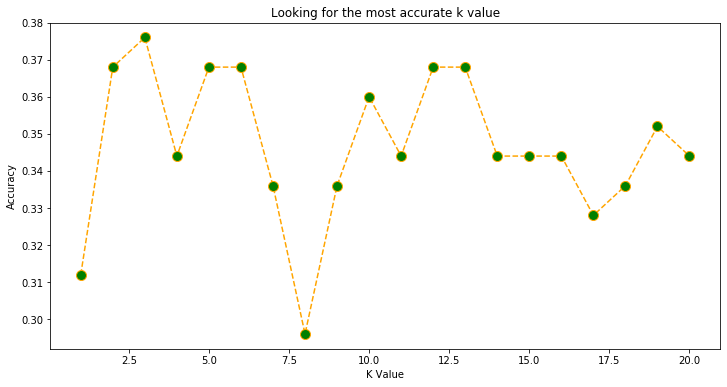

In [147]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [148]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 37.6 %


### 3 MOST COMMON ODOR NAMES 

In [93]:
sensorama_3 = sensorama_3 .sort_values('odor name')

In [149]:
sensorama2_3=[]

for i in range(85, len(sensorama_3)-85):
    if sensorama_3.iloc[i,4] == sensorama_3.iloc[i+85,4] or sensorama_3.iloc[i,4] == sensorama_3.iloc[i-85,4]:
        sensorama2_3.append(sensorama_3.iloc[i,:]) 

sensorama2_3= pd.DataFrame(sensorama2_3)
sensorama2_3

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
5976,61096.000000,2895.000000,0.763846,3.000000,188.000000,1.012193,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.343633,-0.287748,0.650686,0.000000,0.000000,0.465831,0.966323,0.724451,0.128970,-0.161598
9780,105664.000000,3179.000000,1.041924,3.000000,188.000000,1.064608,0.200130,-0.631781,0.632666,-0.644741,...,1.176098,1.825074,1.181228,0.000000,0.000000,1.050443,1.149105,0.951344,0.690191,-0.161598
2741,10778.000000,1332.000000,-0.835104,3.000000,188.000000,-1.559487,0.200130,1.183366,0.632666,1.285620,...,-0.205428,-0.239875,-0.834833,0.000000,0.000000,-0.725131,-0.782190,-0.685830,-0.396780,-0.161598
7853,74351.000000,1305.000000,1.250483,3.000000,188.000000,-2.103475,1.278317,2.998513,2.371507,3.215981,...,0.347392,0.000560,-0.304291,0.000000,0.000000,0.057535,-0.168958,-0.347946,0.924025,-0.161598
17988,92256353.000000,512.000000,0.207689,3.000000,188.000000,0.488423,0.200130,-0.631781,0.632666,-0.644741,...,0.624314,0.529302,0.756794,0.000000,0.000000,0.746787,0.450242,0.165028,0.495772,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,85979.000000,956.000000,-0.626545,3.000000,237.000000,-1.268212,0.200130,1.183366,0.632666,1.285620,...,-0.343122,-0.287748,-0.622616,0.000000,0.000000,-0.488251,-0.479356,-0.540129,-0.171256,-0.161598
13198,2724898.000000,2514.000000,-0.139908,3.000000,237.000000,0.416540,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.988249,-0.912238,-0.410399,0.000000,0.000000,-0.576404,0.055253,-0.182136,-0.796702,-0.161598
2549,9895.000000,1152.000000,-0.278948,3.000000,237.000000,0.229345,0.200130,-0.631781,0.632666,-0.644741,...,0.255597,0.144180,-0.198182,0.000000,0.000000,-0.212547,0.249833,-0.019893,-0.343095,-0.161598
8596,86869.000000,701.000000,2.988473,3.000000,237.000000,0.229345,2.356503,1.183366,0.632666,1.285620,...,3.342517,3.220355,2.242313,0.000000,0.000000,2.488797,2.256004,2.646708,2.486423,-0.161598


In [150]:
count=0
for i in range(1, len(sensorama2_3)):
    if sensorama2_3.iloc[i,4]!= sensorama2_3.iloc[i-1,4]:
        count = count +1
print(count)

3


In [151]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

#### RANDOM FOREST

Accuracy:  49.42528735632184 %


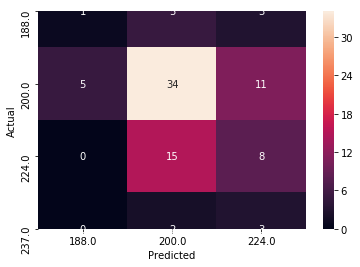

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

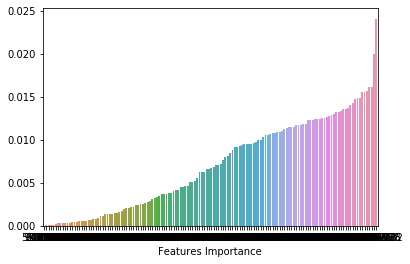

In [153]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [154]:
X = sensorama2_3[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_3['odor name']

Accuracy:  47.12643678160919 %


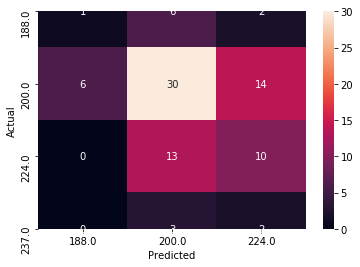

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [156]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 52.87356321839081 %


##### Polynomial Kernel


In [157]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 55.172413793103445 %


##### Sigmoid Kernel 

In [158]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 56.32183908045977 %


#### DECISION TREE

In [159]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 44.230769230769226 %


#### LOGISTIC REGRESSION 

In [160]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  41.37931034482759 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

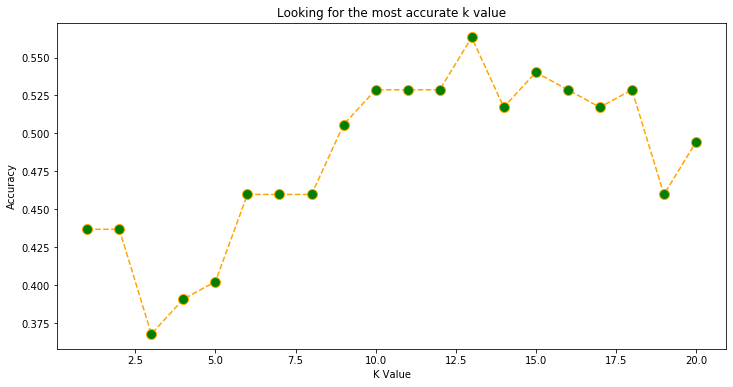

In [161]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [162]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 56.32183908045977 %
